# Objects:


1. Find an appropriate model for data prediction<br>
2. Find out the importance of features

## Find an appropriate model for data prediction

### 1. Import package

In [30]:
#載入pandas
import pandas as pd

#載入邏輯斯回歸
from sklearn.linear_model import LogisticRegression

#載入決策數
from sklearn.tree import DecisionTreeClassifier

#載入隨機森林
from sklearn.ensemble import RandomForestClassifier

#切為訓練節測試集
from sklearn.model_selection import train_test_split

#ROC Curve
from sklearn.metrics import plot_roc_curve

### 2. 了解資料內容

In [3]:
df=pd.read_csv('titanic.csv')
df.head()

,Pclass,Sex,Age,SiblingsSpouses_Aboard,ParentsChildren_Aboard,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [31]:
#了解資料
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pclass                  887 non-null    int64  
 1   Sex                     887 non-null    object 
 2   Age                     887 non-null    float64
 3   SiblingsSpouses_Aboard  887 non-null    int64  
 4   ParentsChildren_Aboard  887 non-null    int64  
 5   Fare                    887 non-null    float64
 6   Survived                887 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


In [32]:
#性別做虛擬變數
df1=pd.get_dummies(df, columns=['Sex','Pclass'],drop_first=True)
df1.head()

,Age,SiblingsSpouses_Aboard,ParentsChildren_Aboard,Fare,Survived,Sex_male,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,0,1,0,1
1,38.0,1,0,71.2833,1,0,0,0
2,26.0,0,0,7.9250,1,0,0,1
3,35.0,1,0,53.1000,1,0,0,0
4,35.0,0,0,8.0500,0,1,0,1


In [33]:
#確認資料處理
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     887 non-null    float64
 1   SiblingsSpouses_Aboard  887 non-null    int64  
 2   ParentsChildren_Aboard  887 non-null    int64  
 3   Fare                    887 non-null    float64
 4   Survived                887 non-null    int64  
 5   Sex_male                887 non-null    uint8  
 6   Pclass_2                887 non-null    uint8  
 7   Pclass_3                887 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 37.4 KB


#### 自變數X

In [48]:
X=df1.iloc[:,[0,1,2,3,5,6,7]]

#### 依變數Y

In [49]:
#Y為survived: 0為沒有, 1為有
y=df['Survived']
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
882    0
883    1
884    0
885    1
886    0
Name: Survived, Length: 887, dtype: int64


# Machine Learning

## 訓練資料

In [50]:
#以7:3的比例下去分
#設立每次所抓取的資料為固定同一群
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### 模型選擇

#### 1. logisticregression

In [53]:
#使用邏輯斯迴歸訓練模型
lr = LogisticRegression().fit(X_train, y_train)

#利用訓練好的模型去預測
y_lr_pred=lr.predict(X_test)

C:\Users\euphi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 2. Decision Tree

In [54]:
dt = DecisionTreeClassifier().fit(X_train, y_train)

y_dt_pred=dt.predict(X_test)

#### 3. Random Forest

In [55]:
rf=RandomForestClassifier().fit(X_train, y_train)

y_rf_pred=rf.predict(X_test)

## ROC Curve

C:\Users\euphi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\euphi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\euphi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be remov

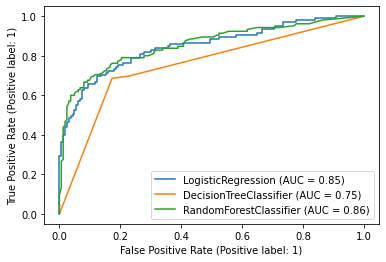

In [73]:
disp=plot_roc_curve(lr, X_test, y_test)
plot_roc_curve(dt, X_test, y_test, ax=disp.ax_);
plot_roc_curve(rf, X_test, y_test, ax=disp.ax_);

#從圖表可知隨機森林的表現最好，其次是邏輯斯回歸，最後才是決策樹
#可推測分類建議使用隨機森林模型進行預測會比較好

## Feature Importance

### 1. SelectKBest

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [58]:
#score_func: 我們想要使用什麼模型來去選擇重要的特徵，算出特徵重要性
#k: 我們想要從data frame裡面選出幾個重要的特徵，這裡選7個
ordered_rank_features = SelectKBest(score_func = chi2, k=7)

#讓model fit X,y
ordered_feature=ordered_rank_features.fit(X,y)

In [59]:
#製作新的Dataframe，新增一欄位
#算出feature score後，將ordered_feature.scores放入新增的欄位中
dfscores=pd.DataFrame(ordered_feature.scores_,columns=['Score'])

#將原先在X中的欄位放到新設定的dataframe中
dfcolumns=pd.DataFrame(X.columns)


#合併特徵跟分數
features_rank=pd.concat([dfcolumns,dfscores], axis=1)

In [60]:
features_rank.columns=['Features','Score']
features_rank
#算出feature importance之後，將feature跟其分數印出來

,Features,Score
0,Age,21.343234
1,SiblingsSpouses_Aboard,2.829911
2,ParentsChildren_Aboard,9.668390
3,Fare,4460.558492
4,Sex_male,92.293805
5,Pclass_2,5.913445
6,Pclass_3,40.994193


In [68]:
features_rank.nlargest(7,'Score')
#將算出來的feature importance根據分數大小進行排序
#可知Fare比其他特徵明顯重要，推測消費者較重視此項目

,Features,Score
3,Fare,4460.558492
4,Sex_male,92.293805
6,Pclass_3,40.994193
0,Age,21.343234
2,ParentsChildren_Aboard,9.668390
5,Pclass_2,5.913445
1,SiblingsSpouses_Aboard,2.829911


### 2. ExtraTreesClassifier

In [69]:
from sklearn.ensemble import ExtraTreesClassifier
#將ExtraTreesClassifier引入程式
import matplotlib.pyplot as plt
#引入繪圖套件
model = ExtraTreesClassifier()

#使用ExtraTreesClassifier模型fit鐵達尼號乘客資料
model.fit(X,y)

ExtraTreesClassifier()

In [70]:
print(model.feature_importances_)
#使用ExtraTreesClassifier算出feature performance分數

[0.2548353  0.04435237 0.03757439 0.26440279 0.29157201 0.01783908
 0.08942405]


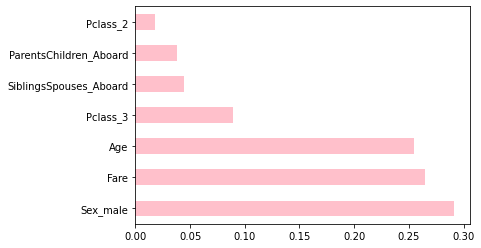

In [72]:
#index: feature name
#將每個feature name對應importance
ranked_feautures=pd.Series(model.feature_importances_, index=X.columns)
 
#畫出排名圖表
ranked_feautures.nlargest(7).plot(kind='barh', color='pink')
plt.show()

## Information Gain

In [65]:
from sklearn.feature_selection import mutual_info_classif
#算出不純資訊(entropy)
#計算出資訊含量多不多

In [66]:
mutual_info=mutual_info_classif(X,y)

In [67]:
mutual_data=pd.Series(mutual_info, index=X.columns)
#index:X.columns即為x中的feature name
#將每個feature name對應的mutual_info算出來的資訊含量數值

mutual_data.sort_values(ascending=False)
#數值越高，資訊含量越高，由此表可知Sex_male最高
#可知Sex_male為 0.160252的資訊含量，以此類推

Sex_male                  0.160252
Fare                      0.115691
Pclass_3                  0.081333
Age                       0.027567
ParentsChildren_Aboard    0.026482
SiblingsSpouses_Aboard    0.000118
Pclass_2                  0.000000
dtype: float64